<a href="https://colab.research.google.com/github/jaasielmark12/AIML--TASK--11/blob/main/SVM_%E2%80%93_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

In [27]:
df = pd.read_csv("/content/breast-cancer.csv")

In [28]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
print("Dataset shape:", df.shape)


Dataset shape: (569, 32)


In [31]:
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [32]:
# Drop ID column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Encode target: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True))
])

linear_pipeline.fit(X_train, y_train)

y_pred_linear = linear_pipeline.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))



Linear SVM Accuracy: 0.9649122807017544


In [35]:
rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

rbf_pipeline.fit(X_train, y_train)

y_pred_rbf = rbf_pipeline.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9736842105263158


In [36]:
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(
    rbf_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best CV Accuracy: 0.9736263736263737


In [37]:
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Confusion Matrix:
 [[72  0]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



AUC Score: 0.996031746031746


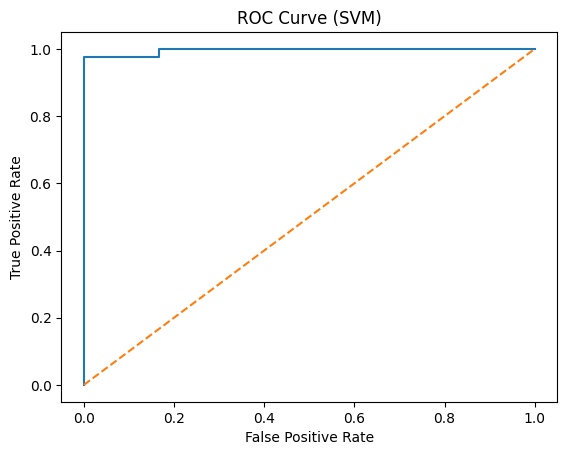

In [38]:
y_prob = best_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM)")
plt.show()


In [39]:
import joblib
joblib.dump(best_model, "svm_breast_cancer_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [40]:
# svm_breast_cancer_model.pkl

In [41]:
import joblib

joblib.dump(best_model, "svm_breast_cancer_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [42]:
loaded_model = joblib.load("svm_breast_cancer_model.pkl")

# Predict on new/unseen data
prediction = loaded_model.predict(X_test[:1])
print("Prediction:", prediction)


Prediction: [0]
